This model is designed find the category of new articles. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.layers import Embedding

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression

import nltk
# nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# for kaggle enviroment
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [2]:
df = pd.read_json('../input/news-category-dataset/News_Category_Dataset_v3.json', lines=True)
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [3]:
# check total number of unique categories
print("Unique categories:",df['category'].nunique(), '\n')
df.info()

Unique categories: 42 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


#### The dataset has huge number of unique categories. It is nessassery to check if the dataset is balanced.
#### Also, the dataset has coloumns which are not relevant to category of the article like (date)
#### All coloumns are non-null

In [4]:
# get more insight of the dataset of dataset
df.describe()

/tmp/ipykernel_28/632815274.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,link,headline,category,short_description,authors,date
count,209527,209527,209527,209527,209527,209527
unique,209486,207996,42,187022,29169,3890
top,https://www.huffingtonpost.comhttps://www.wash...,Sunday Roundup,POLITICS,,,2014-03-25 00:00:00
freq,2,90,35602,19712,37418,100
first,NaN,NaN,NaN,NaN,NaN,2012-01-28 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2022-09-23 00:00:00


#### it seems that there is some duplicated data in coloumns where should not exists  (short_description, headline)
#### 'Politics' is the most common category of news in our dataset.

In [5]:
# Display the duplicated short_description

pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_rows', None)

df[df.duplicated(subset=['short_description'])]

,link,headline,category,short_description,authors,date
1444,https://www.huffpost.com/entry/new-on-netflix-january-2022_l_61bd226ae4b04b42ab5fce98,"New On Netflix January 2022: 'Ozark,' 'Phantom Thread' And More",HOME & LIVING,The streaming service announced the movies and shows arriving soon.,Caroline Bologna,2021-12-23
1806,https://www.huffpost.com/entry/new-movies-shows-netflix-november-2021_l_617023dde4b03072d6f1186d,"New On Netflix November 2021: 'Big Mouth,' 'Tiger King 2' And More",HOME & LIVING,The streaming service announced the movies and shows arriving soon.,Caroline Bologna,2021-10-20
5226,https://www.huffpost.com/entry/israelis-vote-in-3rd-election-to-decide-netanyahus-fate_n_5e5d3d77c5b6732f50e614e3,Netanyahu Holds Solid Lead In Israeli Elections,WORLD NEWS,Early exit polls show Prime Minister Benjamin Netanyahu holds a solid edge over his main rival in Israel’s third election in under a year.,"Aron Heller, AP",2020-03-02
9419,https://www.huffingtonpost.com/entry/reddit-shower-thoughts-may-2018-11_us_5af57fd5e4b0e57cd9f89b9c,"'Dogs May Help Prepare You For Babies, But Cats Help Prepare You For Teenagers'",WEIRD NEWS,The 25 most profound “Shower Thoughts” on Reddit from the last week.,Lee Moran,2018-05-11
9810,https://www.huffingtonpost.com/entry/reddit-shower-thoughts-may-4-2018_us_5aec1c6de4b041fd2d250deb,'Dogs Protect Humans From Other Humans. Humans Protect Dogs From Other Dogs.',WEIRD NEWS,The 25 most profound “Shower Thoughts” on Reddit from the last week.,Lee Moran,2018-05-04
...,...,...,...,...,...,...
209301,https://www.huffingtonpost.com/entry/isabella-rossellini-model_us_5b9b4203e4b03a1dcc7600c8,"Isabella Rossellini Models For Betsey Johnson, 1995: A Look Back",STYLE & BEAUTY,"Take a look out our previous A Look Back photos in the slideshow below. ""A Look Back"" is a daily column that highlights a",Sarah Leon,2012-01-30
209394,https://www.huffingtonpost.com/entry/berenice-bejo-hair_us_5b9b426de4b03a1dcc760a33,Berenice Bejo's Two Beauty Looks: Which Do You Like Best? (POLL),STYLE & BEAUTY,BEAUTY RELATED LINKS YOU MAY LOVE: 8 Simple Makeup Tricks For Flawless Skin - Allure 3 Hair Oils That Will Give You The Softest,Dana Oliver,2012-01-30
209418,https://www.huffingtonpost.com/entry/omarosa-lebron-james-broken-heart_us_5bada665e4b0bb1705fa353e,"Omarosa, Television Personality, Still Nursing A 'Broken Heart' From LeBron James: Love Of The Game",BLACK VOICES,"In our weekly ""Love Of The Game"" series, HuffPost Black Voices talks sports with a person of note. This week we caught up",Brennan Williams,2012-01-29
209466,https://www.huffingtonpost.com/entry/yoga-journal-21-day-challenge_us_5b9b424be4b03a1dcc7607c7,"Yoga Journal 21-Day Challenge, Day 20: Sidebends With Jason Crandell (VIDEO)",WELLNESS,"When our partner Yoga Journal put out the call for their 21-Day Yoga Challenge, we knew we wanted to be a part of it. Over",,2012-01-28


#### there are some rows with duplicate short_description but with diffrent headlines, date , ...
#### while others rows seems to fully duplicated 

In [6]:
# check if there is rows with duplicated headline and dshort_description
df[df.duplicated(subset=['headline', 'short_description'])].sort_values(['headline'])

,link,headline,category,short_description,authors,date
122145,https://www.huffingtonpost.com/entry/beverly-hills-hotel-boyco_b_5711931.html,,QUEER VOICES,,"Gary Snyder, ContributorWriter and Media Strategist",2014-08-28
103675,https://www.huffingtonpost.com/entry/us-and-europes-economic-a_b_6962262.html,,WORLDPOST,,"Natasha Srdoc, ContributorAuthor, Economist, Co-Founder, Adriatic Institute and Internat...",2015-03-29
109100,https://www.huffingtonpost.com/entry/disney-ceo-iger-readies-m_b_6520290.html,,BUSINESS,,"Gary Snyder, ContributorWriter and Media Strategist",2015-01-25
110153,https://www.huffingtonpost.com/entry/beverly-hills-hotel-caugh_b_6414708.html,,MEDIA,,"Gary Snyder, ContributorWriter and Media Strategist",2015-01-13
208789,https://www.huffingtonpost.com/entry/black-love-wedding-announcements-1_us_5bada7b4e4b0bb1705fa3f06,'Black Love' Wedding Announcements (PHOTOS),BLACK VOICES,"""Black Love"" Wedding Announcements: Getting married? Celebrating a wedding anniversary? If so, share your love with us, here",Julee Wilson,2012-02-05
...,...,...,...,...,...,...
208107,https://www.huffingtonpost.com/entry/whitney-houston-dies_us_5b9b50fae4b03a1dcc7692d4,"Whitney Houston Dies, Her Glittering Style Remembered (PHOTOS)",STYLE & BEAUTY,"And within the fashion world, of course, Whitney will always be remembered for having style befitting her ""diva"" status. With",Ellie Krupnick,2012-02-12
58161,https://www.huffingtonpost.com/entry/why-i-march-from-1963-to-_1_b_11753128.html,Why I March: From 1963 To Today,POLITICS,We knew on that bridge in Selma that we were staring down a pivotal moment in history. I believe the same is true in 2016.,"Rep. John Lewis, Contributor",2016-08-28
192998,https://www.huffingtonpost.com/entry/why-you-should-watch-the_us_5b9c0aece4b03a1dcc7bf1e8,Why You Should Watch The Summer Olympics With Your Kids,PARENTING,"Every parent wants his child to learn sportsmanship, and there's nothing quite like the Olympics to show you how it's done.","Betsy Brown Braun, Contributor\nChild development and behavior specialist, author, wife, mom, ...",2012-07-24
19009,https://www.huffingtonpost.com/entry/octavia-spencer-the-shape-of-water-clip_us_5a26d23ee4b069df71fa1c0e,"With This 'Shape Of Water' Clip, You'll Fall For Octavia Spencer In 60 Seconds",ENTERTAINMENT,Spencer and Sally Hawkins play 1960s janitors in Guillermo del Toro's wonderful new movie.,Matthew Jacobs,2017-12-05


* Now we found all rows with duplicated headline and short_description. 
* But a new issue appeard that there are come rows with empty headline and/or short_description which might not been detected earlier as '' is non_null


In [7]:
# rest display full / non-truncated dataframe information
pd.reset_option('display.max_colwidth')
pd.reset_option('display.max_rows')

In [8]:
# Was 209527 row after cleanning should be 209038
df = df.drop_duplicates(subset=['headline', 'short_description'], keep='last')
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [9]:
# here I displayed the row with no headline
# I don't belevie we need to remove anything here, short_description is long enough for this stage
# The second row will be remove in future steps
df[df['headline'] == '']

,link,headline,category,short_description,authors,date
95567,https://www.huffingtonpost.com/entry/post_9671...,,RELIGION,Let everyone not wrapped in tired and disprove...,"Matthew Fox, ContributorRadical theologian Mat...",2015-06-30
122145,https://www.huffingtonpost.com/entry/beverly-h...,,QUEER VOICES,,"Gary Snyder, ContributorWriter and Media Strat...",2014-08-28


In [10]:
# non related columns are removed from the dataframe
df = df.drop(columns=['authors','link','date'])
df.head()

,headline,category,short_description
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha..."
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to..."
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...


# Visualizing the categories

Total number of categories: 42
POLITICS          35582
WELLNESS          17940
ENTERTAINMENT     17358
TRAVEL             9897
STYLE & BEAUTY     9677
PARENTING          8763
HEALTHY LIVING     6689
QUEER VOICES       6344
FOOD & DRINK       6340
BUSINESS           5989
COMEDY             5389
SPORTS             5077
BLACK VOICES       4580
HOME & LIVING      4285
PARENTS            3897
THE WORLDPOST      3664
WEDDINGS           3653
CRIME              3558
WOMEN              3484
IMPACT             3482
DIVORCE            3423
WORLD NEWS         3297
MEDIA              2941
WEIRD NEWS         2777
GREEN              2617
WORLDPOST          2578
RELIGION           2570
STYLE              2247
SCIENCE            2206
TASTE              2096
TECH               2055
MONEY              1756
ARTS               1509
ENVIRONMENT        1443
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1338
COLLEGE            1144
LATINO VOICES      1130
CULTURE &

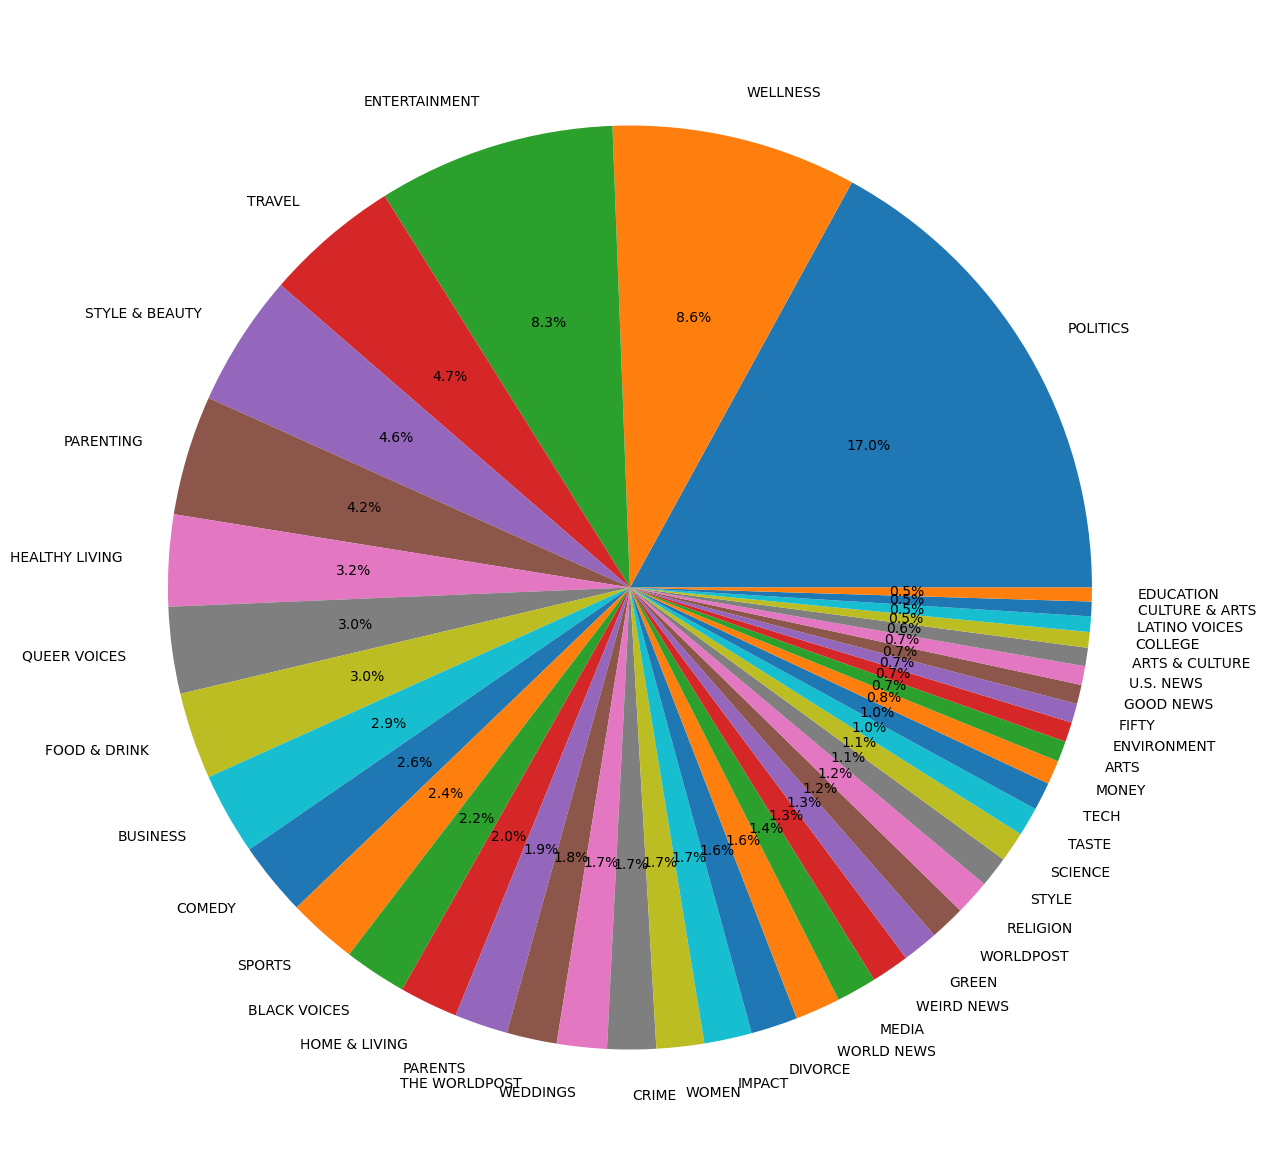

In [11]:
print("Total number of categories:", df['category'].nunique())
print(df['category'].value_counts())

fig = plt.figure(figsize=(15,15))
plt.pie(df['category'].value_counts().values, 
        labels=df['category'].value_counts().index,
        autopct='%1.1f%%');

### We have a lot of categories and the data is not distrputed eavnly between them this issue could be fixed using compination of these methods:
* Removing the categories with the lowes examples
* Merging similar categories
* Create artificial data to balance the data

### Lets begain with evaluating the performance for only the top 12 catagories

In [12]:
# only keep the top 12 most common categories 
df12 = df.copy()

top = list(df12['category'].value_counts().head(12).index)
print(top)

df12 = df12[df12['category'].isin(top)]


['POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'TRAVEL', 'STYLE & BEAUTY', 'PARENTING', 'HEALTHY LIVING', 'QUEER VOICES', 'FOOD & DRINK', 'BUSINESS', 'COMEDY', 'SPORTS']


In [13]:
# compine the headline col with the short discription col
df12['text'] = df['headline'].astype(str)+" - "+df['short_description']
df12.drop(['headline','short_description'], inplace=True, axis=1)
df12['length'] = df12['text'].map(lambda x: len(x.split())).astype(int)
df12

,category,text,length
2,COMEDY,23 Of The Funniest Tweets About Cats And Dogs ...,26
3,PARENTING,The Funniest Tweets From Parents This Week (Se...,35
17,SPORTS,"Maury Wills, Base-Stealing Shortstop For Dodge...",29
20,ENTERTAINMENT,Golden Globes Returning To NBC In January Afte...,36
21,POLITICS,Biden Says U.S. Forces Would Defend Taiwan If ...,19
...,...,...,...
209513,ENTERTAINMENT,'Girl With the Dragon Tattoo' India Release Ca...,38
209523,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,31
209524,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",41
209525,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,29


In [14]:
# remove extra coloumns to balance the dataset
df12_downsized = df12.copy()

indexPOLITICS = df12_downsized[ (df12_downsized['category'] == 'POLITICS')].index[:25000]
df12_downsized.drop(indexPOLITICS , inplace=True)

indexPOLITICS = df12_downsized[ (df12_downsized['category'] == 'WELLNESS')].index[:7000]
df12_downsized.drop(indexPOLITICS , inplace=True)


indexPOLITICS = df12_downsized[ (df12_downsized['category'] == 'ENTERTAINMENT')].index[:7000]
df12_downsized.drop(indexPOLITICS , inplace=True)


df12_downsized

,category,text,length
2,COMEDY,23 Of The Funniest Tweets About Cats And Dogs ...,26
3,PARENTING,The Funniest Tweets From Parents This Week (Se...,35
17,SPORTS,"Maury Wills, Base-Stealing Shortstop For Dodge...",29
26,SPORTS,"Las Vegas Aces Win First WNBA Title, Chelsea G...",23
61,SPORTS,Boston Marathon To Make Race More Inclusive Fo...,35
...,...,...,...
209513,ENTERTAINMENT,'Girl With the Dragon Tattoo' India Release Ca...,38
209523,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,31
209524,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",41
209525,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,29


### Now the classes are more palanced after some classes were downsized

Total number of categories: 12
WELLNESS          10940
POLITICS          10582
ENTERTAINMENT     10358
TRAVEL             9897
STYLE & BEAUTY     9677
PARENTING          8763
HEALTHY LIVING     6689
QUEER VOICES       6344
FOOD & DRINK       6340
BUSINESS           5989
COMEDY             5389
SPORTS             5077
Name: category, dtype: int64


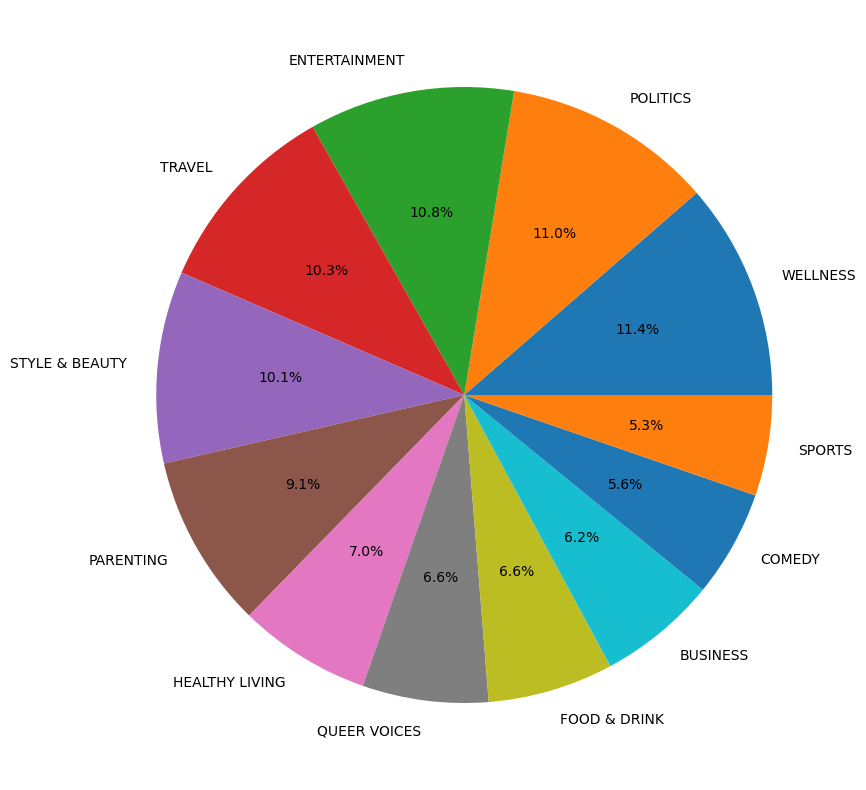

In [15]:
print("Total number of categories:", df12_downsized['category'].nunique())
print(df12_downsized['category'].value_counts())

fig = plt.figure(figsize=(10,10))
plt.pie(df12_downsized['category'].value_counts().values, 
        labels=df12_downsized['category'].value_counts().index,
        autopct='%1.1f%%');

#### To get more insight of the data, the maximum, minimum length and the mean length of the text (headline + short_discription) is calculated for each category 

In [16]:
# maximum number of words in each category
max_len = df12_downsized.groupby('category')['length'].max().reset_index().sort_values(by='length',ascending=False)
max_len

,category,length
4,HEALTHY LIVING,177
6,POLITICS,177
10,TRAVEL,176
11,WELLNESS,172
9,STYLE & BEAUTY,166
0,BUSINESS,154
5,PARENTING,151
3,FOOD & DRINK,134
1,COMEDY,129
2,ENTERTAINMENT,99


In [17]:
# minimum number of words in each category
min_len = df12_downsized.groupby('category')['length'].min().reset_index().sort_values(by='length',ascending=True)
min_len

,category,length
7,QUEER VOICES,1
0,BUSINESS,2
1,COMEDY,2
2,ENTERTAINMENT,2
4,HEALTHY LIVING,2
6,POLITICS,2
8,SPORTS,2
10,TRAVEL,2
9,STYLE & BEAUTY,3
3,FOOD & DRINK,5


In [18]:
# mean number of words in each category
mean_len = df12_downsized.groupby('category')['length'].mean().reset_index().sort_values(by='length',ascending=False)
mean_len

,category,length
11,WELLNESS,40.207678
5,PARENTING,39.463540
10,TRAVEL,35.758311
9,STYLE & BEAUTY,33.173711
0,BUSINESS,32.260144
7,QUEER VOICES,30.788146
4,HEALTHY LIVING,29.312154
6,POLITICS,27.936496
3,FOOD & DRINK,27.179495
8,SPORTS,24.936971


* We can assume that text that are too short (less than n words/ chars length) are hard to classifiy therefore they will be romved
* n is a parameter to be tuned

In [19]:
min_words = 8
df12_downsized = df12_downsized[(df12_downsized['length'] > min_words)]
df12_downsized

,category,text,length
2,COMEDY,23 Of The Funniest Tweets About Cats And Dogs ...,26
3,PARENTING,The Funniest Tweets From Parents This Week (Se...,35
17,SPORTS,"Maury Wills, Base-Stealing Shortstop For Dodge...",29
26,SPORTS,"Las Vegas Aces Win First WNBA Title, Chelsea G...",23
61,SPORTS,Boston Marathon To Make Race More Inclusive Fo...,35
...,...,...,...
209513,ENTERTAINMENT,'Girl With the Dragon Tattoo' India Release Ca...,38
209523,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,31
209524,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",41
209525,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,29


In [20]:
# drop the length coloumn as there is no need for is any more
df12_downsized = df12_downsized.drop(columns=['length'])

# shuffle the dataframe
df12_downsized = shuffle(df12_downsized)
df12_downsized.reset_index(inplace=True, drop=True)
df12_downsized

,category,text
0,PARENTING,FDA Debates Starting Clinical Trials For 3-Par...
1,TRAVEL,The Most Spectacular Views Are High Above The ...
2,STYLE & BEAUTY,Chloￃﾫ Sevigny's Button-Down Keeps Her Look In...
3,SPORTS,These Are The Parents We All Know From Little ...
4,TRAVEL,"Quest For Wonder: Galapagos Islands (PHOTOS, V..."
...,...,...
93030,FOOD & DRINK,Best Of Reddit's Shitty Food Porn (PHOTOS) - W...
93031,COMEDY,Louis C.K.'s Lincoln Turns President Into Stan...
93032,COMEDY,Jimmy Kimmel Asked People About Fake Bands At ...
93033,ENTERTAINMENT,You Can Actually Be Batman With This New 3D-Pr...


### Text Preprocessing

In [21]:
stop_words = set(stopwords.words('english'))
wnl = WordNetLemmatizer()

def textPreprocessing(text):
    # removing stop words as they provide not value to the context
    text = [word for word in text.split() if word not in list(stop_words)]
    
    # word lemmatization
    sentence = []
    for word in text:
        sentence.append(wnl.lemmatize(word,'v'))
        
    return ' '.join(sentence)

before_preprocessing = df12_downsized['text'].apply(lambda x: len([i for i in x.split()])).sum()
print(f"Befor, text word count: {before_preprocessing}")

df12_downsized['text'] = df12_downsized['text'].apply(textPreprocessing)

after_preprocessing = df12_downsized['text'].apply(lambda x: len([i for i in x.split()])).sum()
print(f"After, text word count: {after_preprocessing}")

Befor, text word count: 2998243
After, text word count: 2178495


### Tokenizing

In [22]:
X,Y = df12_downsized['text'],df12_downsized['category']

#85% to train , 7.5% for validation , 7.5% for testing
X_train, X_val, y_train, y_val = train_test_split(X,Y, test_size=0.15, random_state=42)
X_val, X_test , y_val, y_test= train_test_split(X_val,y_val, test_size=0.5, random_state=42)

print('X_train', len(X_train))
print('X_val', len(X_val))
print('X_test', len(X_test))

X_train 79079
X_val 6978
X_test 6978


In [23]:
# maximum number of words to keep, based on word frequency.
vocab_size =20000
# out of vocab tag
oov_tok = "<OOV>"


max_length = 170

# pad either before or after each sequence
padding_type='post' #"pre"

# remove values from sequences larger than maxlen
trunc_type='post'

In [24]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train,maxlen= max_length,padding=padding_type, truncating=trunc_type)
y_train = np.asarray(y_train)
y_train = pd.get_dummies(y_train)

X_val = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(X_val,maxlen= max_length,padding=padding_type, truncating=trunc_type)
y_val = np.asarray(y_val)
y_val = pd.get_dummies(y_val)

train_set = np.array(X_train)
val_set = np.array(X_val)

train_label = np.array(y_train)
val_label = np.array(y_val)


y_test = pd.get_dummies(y_test)
y_test = np.asarray(y_test)
y_test = np.argmax(y_test,axis=1)   #this would be our ground truth label while testing

print(train_set.shape)
print(train_label.shape)


print(val_set.shape)
print(val_label.shape)

(79079, 170)
(79079, 12)
(6978, 170)
(6978, 12)


In [25]:
len(np.argmax(train_label,axis =1))

79079

## Machine learning model

In [26]:
log_reg = LogisticRegression()

log_reg.fit(train_set , np.argmax(train_label,axis =1))

y_train_pred = log_reg.predict(train_set)
y_test_pred = log_reg.predict(val_set)

print(classification_report(np.asarray(np.argmax(train_label,axis =1)),np.asarray(y_train_pred)))
print()
print(classification_report(np.asarray(np.argmax(val_label,axis =1)),np.asarray(y_test_pred)))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.19      0.00      0.00      4794
           1       0.00      0.00      0.00      4350
           2       0.17      0.54      0.26      8293
           3       0.14      0.04      0.06      5356
           4       0.19      0.00      0.00      5193
           5       0.26      0.02      0.03      7476
           6       0.13      0.11      0.12      8395
           7       0.12      0.00      0.00      5302
           8       0.00      0.00      0.00      4105
           9       0.20      0.36      0.26      8203
          10       0.14      0.21      0.17      8279
          11       0.18      0.31      0.23      9333

    accuracy                           0.17     79079
   macro avg       0.14      0.13      0.09     79079
weighted avg       0.15      0.17      0.12     79079


              precision    recall  f1-score   support

           0       0.50      0.00      0.01       446
           1       0.00

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif

* the ml model did not perform as expexted this might be because there is an implementaion issue or becaue the task is complex for this approach

## Deep leaining model

In [32]:
 #downloading glove word embeddings
!wget https://huggingface.co/stanfordnlp/glove/resolve/main/glove.6B.zip

#unzipping 
!unzip -q glove.6B.zip

--2023-07-03 07:16:51--  https://huggingface.co/stanfordnlp/glove/resolve/main/glove.6B.zip
Resolving huggingface.co (huggingface.co)... 108.138.94.45, 108.138.94.52, 108.138.94.27, ...
Connecting to huggingface.co (huggingface.co)|108.138.94.45|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/stanfordnlp/glove/6471382cdd837544bf3ac72497a38715e845897d265b2b424b4761832009c837?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27glove.6B.zip%3B+filename%3D%22glove.6B.zip%22%3B&response-content-type=application%2Fzip&Expires=1688627811&Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly9jZG4tbGZzLmh1Z2dpbmdmYWNlLmNvL3N0YW5mb3JkbmxwL2dsb3ZlLzY0NzEzODJjZGQ4Mzc1NDRiZjNhYzcyNDk3YTM4NzE1ZTg0NTg5N2QyNjViMmI0MjRiNDc2MTgzMjAwOWM4Mzc%7EcmVzcG9uc2UtY29udGVudC1kaXNwb3NpdGlvbj0qJnJlc3BvbnNlLWNvbnRlbnQtdHlwZT0qIiwiQ29uZGl0aW9uIjp7IkRhdGVMZXNzVGhhbiI6eyJBV1M6RXBvY2hUaW1lIjoxNjg4NjI3ODExfX19XX0_&Signature=uyPJbvTtAxf9HHQ4VNm5Iwt

In [33]:
path_to_glove_file =  './glove.6B.100d.txt'

In [34]:
#Initialising the embedding matrix with glove vec embeddings

num_tokens = len(tokenizer.word_index.items()) + 2

print('Number of tokens:', num_tokens)

embedding_dim = 100
hits = 0
misses = 0


embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))


# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
        
print("Converted words:", hits)
print("Misses words ", misses)

Number of tokens: 71855
Found 400001 word vectors.
Converted words: 50216
Misses words  21637


In [35]:
keras.backend.clear_session()

embed_size = 100
model = keras.models.Sequential([
        Embedding(num_tokens,
        embedding_dim,
        embeddings_initializer=keras.initializers.Constant(embedding_matrix),
        mask_zero=True,input_shape=[None],trainable=True),
        keras.layers.Bidirectional(keras.layers.LSTM(512, dropout = 0.4)),
        keras.layers.Dense(12, activation="softmax")
            
        ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         7185500   
                                                                 
 bidirectional (Bidirectiona  (None, 1024)             2510848   
 l)                                                              
                                                                 
 dense (Dense)               (None, 12)                12300     
                                                                 
Total params: 9,708,648
Trainable params: 9,708,648
Non-trainable params: 0
_________________________________________________________________


In [36]:
# early stop to prevent over fiting and save the best model
callbacks= [
            keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001),
            keras.callbacks.ModelCheckpoint('classifier.h5', monitor='val_loss', save_best_only=True),
            keras.callbacks.CSVLogger('classifier.csv')
            ]
opt = keras.optimizers.Adam(learning_rate=0.0001)

batch_size = 42
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
history = model.fit( train_set,train_label,
                     batch_size = batch_size,
                     steps_per_epoch=len(X_train) // batch_size, 
                     validation_data = (val_set , val_label),
                     validation_steps = len(val_set)//batch_size, 
                     epochs=100,
                     callbacks=  callbacks)

Epoch 1/100
1882/1882 [==============================] - 64s 29ms/step - loss: 1.1870 - accuracy: 0.6170 - val_loss: 0.9393 - val_accuracy: 0.6955
Epoch 2/100
1882/1882 [==============================] - 50s 26ms/step - loss: 0.9527 - accuracy: 0.6922 - val_loss: 0.8603 - val_accuracy: 0.7202
Epoch 3/100
1882/1882 [==============================] - 49s 26ms/step - loss: 0.8639 - accuracy: 0.7208 - val_loss: 0.8066 - val_accuracy: 0.7415
Epoch 4/100
1882/1882 [==============================] - 50s 26ms/step - loss: 0.8017 - accuracy: 0.7406 - val_loss: 0.7865 - val_accuracy: 0.7461
Epoch 5/100
1882/1882 [==============================] - 50s 27ms/step - loss: 0.7479 - accuracy: 0.7574 - val_loss: 0.7500 - val_accuracy: 0.7596
Epoch 6/100
1882/1882 [==============================] - 51s 27ms/step - loss: 0.7025 - accuracy: 0.7709 - val_loss: 0.7188 - val_accuracy: 0.7686
Epoch 7/100
1882/1882 [==============================] - 49s 26ms/step - loss: 0.6647 - accuracy: 0.7838 - val_loss: 0

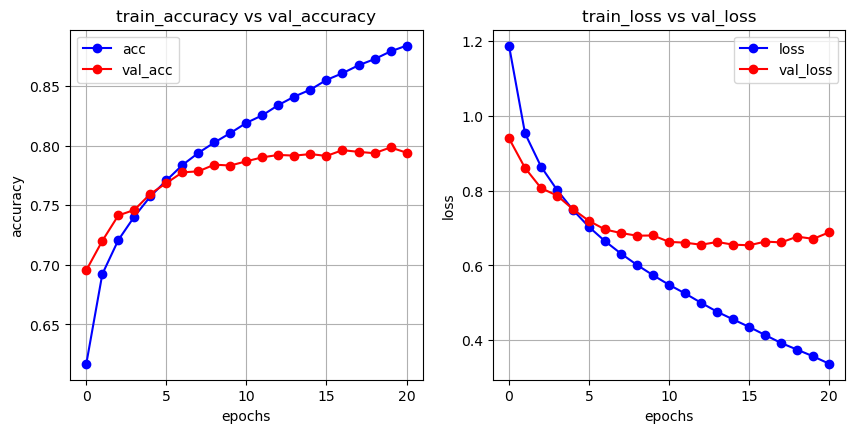

In [37]:
 fig = plt.figure(figsize=(10,10))

# Plot accuracy for training data
plt.subplot(221)
plt.plot(history.history['accuracy'],'bo-', label = "acc")
plt.plot(history.history['val_accuracy'], 'ro-', label = "val_acc")
plt.title("train_accuracy vs val_accuracy")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.grid(True)
plt.legend()

# Plot loss function
plt.subplot(222)
plt.plot(history.history['loss'],'bo-', label = "loss")
plt.plot(history.history['val_loss'], 'ro-', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.grid(True)
plt.legend()

219/219 [==============================] - 4s 6ms/step
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       459
           1       0.69      0.64      0.66       351
           2       0.79      0.84      0.82       725
           3       0.86      0.84      0.85       488
           4       0.58      0.53      0.55       479
           5       0.81      0.78      0.80       652
           6       0.82      0.84      0.83       732
           7       0.84      0.79      0.81       448
           8       0.89      0.85      0.87       385
           9       0.88      0.89      0.89       741
          10       0.85      0.89      0.87       729
          11       0.68      0.74      0.71       789

    accuracy                           0.79      6978
   macro avg       0.79      0.78      0.78      6978
weighted avg       0.79      0.79      0.79      6978



Text(0.5, 1.0, 'Confusion matrix of model')

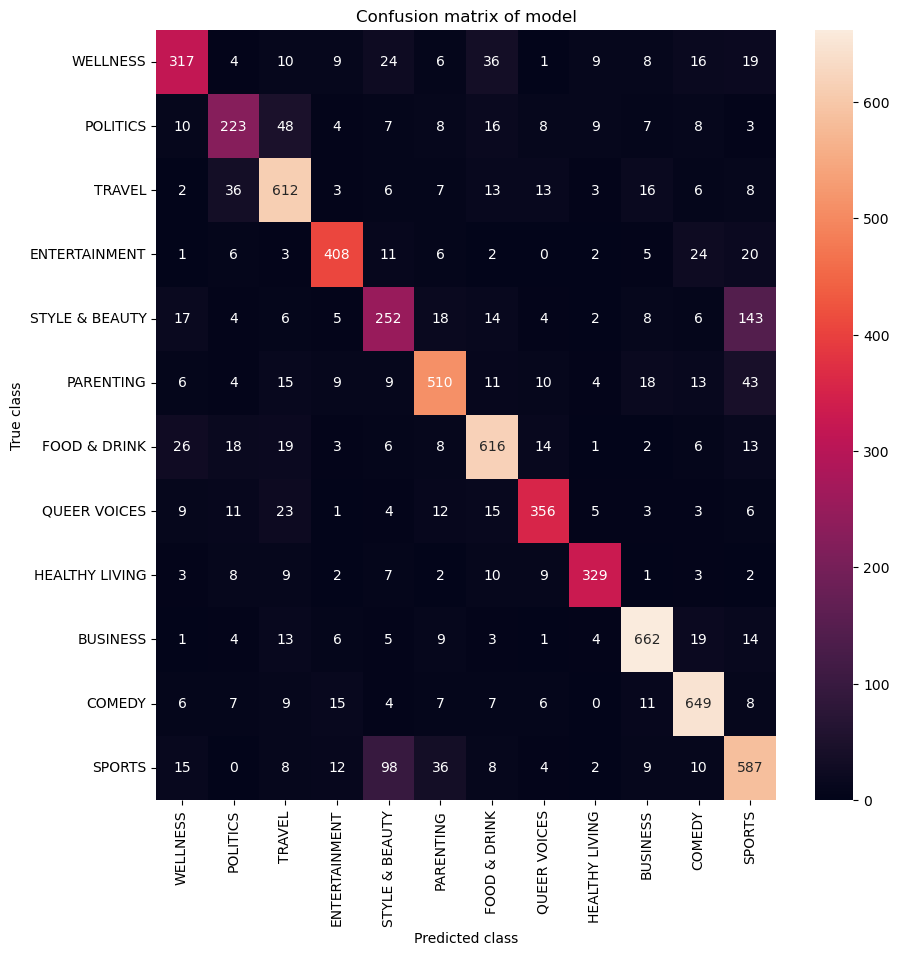

In [38]:
def prediction(data):
    X = tokenizer.texts_to_sequences(data)
    X = pad_sequences(X,maxlen= max_length,padding=padding_type, truncating=trunc_type)
    pred = model.predict(X)
    pred_value = np.argmax(pred,axis =1)              
    return pred_value

y_pred = prediction(X_test)
print(classification_report(np.asarray(y_test),np.asarray(y_pred)))


classes = df12_downsized['category'].value_counts().index
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(cf_matrix, xticklabels=classes,
                      yticklabels=classes,
                      annot=True, fmt='d')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')

* The model perform  well for most classes with overall accuracy around 80%. 
* Business, Comedy and Healthy living are the best classified classes
* We can see that Style and Beauty class performed the worst. Many were mis-classified as sport maybe becuse of commen words

## Demo

##### Note it is only showcase example

What the application would look like:
we will have function that use http request to run the model and then return the results

In [ ]:
import requests
import json

# Function to classify a single news article
def classify_article(article):
    # Make a POST request to the AI model's classification API
    response = requests.post('http://your-model-api.com/classify', json={'article': article})

    # Process the response
    if response.status_code == 200:
        result = json.loads(response.text)
        category = result['category']
        confidence = result['confidence']
        return category, confidence
    else:
        return None, None

# Function to classify newly added articles and provide recommendations
def classify_new_articles(new_articles):
    recommendations = []

    for article in new_articles:
        category, confidence = classify_article(article)

        if category is not None and confidence is not None:
            # Provide recommendations based on the category and confidence
            recommendations.append({
                'article': article,
                'category': category,
                'confidence': confidence
            })

    return recommendations

# Example usage
new_articles = [
    "Lorem ipsum dolor sit amet, consectetur adipiscing elit.",
    "Sed eget felis sed lacus commodo consequat.",
    "In tincidunt enim at mi bibendum, sit amet sollicitudin neque cursus."
]

existing_articles = [
    "Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas.",
    "Donec sed diam ut risus scelerisque feugiat nec ac ex.",
    "Curabitur fermentum mi vitae leo tristique, nec consectetur enim rhoncus."
]

# Classify new articles and provide recommendations
recommendations = classify_new_articles(new_articles)
print("Recommendations:")
for recommendation in recommendations:
    print(f"Article: {recommendation['article']}")
    print(f"Category: {recommendation['category']}")
    print(f"Confidence: {recommendation['confidence']}")
    print()

# Analyze all articles on the website
article_categories = analyze_all_articles(existing_articles)
print("Article Categories:")
for article, category_info in article_categories.items():
    print(f"Article: {article}")
    print(f"Category: {category_info['category']}")
    print(f"Confidence: {category_info['confidence']}")
    print()